<h1>Raster-1. Raster Analysis in ArcGIS Python, Introduction</h1>

This lecture will cover an additional type of data layers: raster. 

1. Raster vs Vector (https://docs.google.com/presentation/d/1-maDL0Pmxa53ehc8lDN5u9JkRuGZGW4Dd40VUMY9Baw/edit?usp=sharing)
1. Introduction to imagery layers and some remote sensing concepts
1. An example application: change detection analysis



## Raster and the measurement frameworks

In its simplest form, a raster consists of a matrix of cells (or pixels) organized into rows and columns (or a grid) where each cell contains a value representing information, such as temperature. Rasters are digital aerial photographs, imagery from satellites, digital pictures, or even scanned maps.

In terms of measurement frameworks (remember the first week): this refers to "field view" of information representation: there is a value everywhere (as opposed to a vector model: space is populated by vector objects, but values don't have to be defined at every point in space.) An initial tesselation of space into raster cells or pixels is a starting point ("space is controlled"), while value is measured for every cell. How these values are measured and assigned to each cell - is an interesting story. There are many options which will define statisical properties of the rasters.

Cell values can be assigned based on the value measured at the center point of each cell (e.g., in elevation.) Alternatively, based on some other selected point in a cell (e.g., a randomly selected point.)

Or they can represent the whole square cell, as a 'majority', or 'sum', or some other function of underlying measurements within the cell.

For example, when a point layer is converted into a raster layer, there can be a rule that if a point is inside a cell then this cell will be coded with the value of the point. But what if there are two or more points in a cell? Either randomly select one of them to assign value, or select an assignment function. Such functions (as implemented in raster analysis packages) can be:

* MOST_FREQUENT —If there is more than one feature within the cell, the one with the most common attribute, in the Value field, is assigned to the cell. If they have the same number of common attributes, the one with the lowest FID is used.
* SUM —The sum of the attributes of all the points within the cell (not valid for string data).
* MEAN —The mean of the attributes of all the points within the cell (not valid for string data).
* STANDARD_DEVIATION —The standard deviation of attributes of all the points within the cell. If there are less than two points in the cell, the cell is assigned NoData (not valid for string data).
* MAXIMUM —The maximum value of the attributes of the points within the cell (not valid for string data).
* MINIMUM —The minimum value of the attributes of the points within the cell (not valid for string data).
* RANGE —The range of the attributes of the points within the cell (not valid for string data).
* COUNT —The number of points within the cell.

Also it is possible to specify a "priority field", which will be used to select a point for value assignment.

For line representation in a raster: for any line that passes within the extent of a cell, that cell will receive the value of the attribute identified in the conversion. Assignment options and issues are similar: which features to select, what to do when there are multiple features in a cell, how to combine values. Also, as with point data, linear features will become the width of the cell - which may not be desirable (think of representing roads when cell size is 1km).

Area data (polygons, surfaces) are better suited for raster representation than points or lines. A raster polygon is a group of contiguous cells with the same value that most accurately portray the shape of the area.


The same phenomenon in a categorical coverage can be shown with different resolutions - this is a cause of several interesting statistical issues.

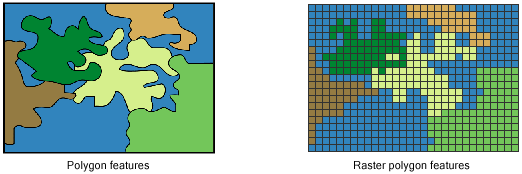

See the lecture PPT for more info.

## Raster operations and imagery layers 

**Thematic** and **continuous** rasters may be displayed as data layers along with other geographic data on your map but are often used as the source data for spatial analysis.

Thematic rasters (land use, soils, etc): are also often represented using vectors. Typically, "integer" rasters store codes of categories (of different types of land use, soils, etc.) They are also known as "categorical coverages".

Continuous rasters (temperature, elevation, band reflectance, rainfall, etc.): typically store floating point values.

The `arcgis.raster` module contains classes and raster analysis functions for working with raster data and imagery layers.

Raster data is made up of a grid of cells, where each cell or pixel can have a value. Raster data is useful for storing data that varies continuously, as in a satellite image, a surface of chemical concentrations, or an elevation surface.

The `Imagerylayer` class represents an image service resource as a layer. An `ImageryLayer` object retrieves and displays data from image services. `ImageryLayer` allows you to and apply server defined or client-defined rendering rules (e.g. remap, colormap), and mosaic rules.

**A fairly new useful resource** decribing basics of imagery analysis is this Story Map: https://esriukcontent.maps.arcgis.com/apps/Cascade/index.html?appid=10b1665c32aa43ab92bd73aae8827bad


**This notebook should run on both UCSD Datahub and on ArcGIS Enterprise Instances (and on AGOL)**

## Accessing imagery layers



We can find and access them as any other layers in AGOL

In [ ]:
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

from arcgis import GIS
from IPython.display import display


In [ ]:
# it is usually a good idea to login to AGOL, because some layer will be available through that gis object
# in particular, you need to login when you want to access your layers on ArcGIS Online

# agol = GIS(username='izaslavsky_ucsd')

# However, as I recently learned from ESRI, 
# access to some Living Atlas layers requires that you DON'T authenticate (!!??). 


# agol = GIS("https://arcgis.com")
gis = GIS()

In [ ]:
import arcgis.raster

In [ ]:
# Let's explore Landsat, a widely used source of Earth imagery
landsat_items = gis.content.search('Multispectral Landsat', 'Imagery Layer', outside_org=True)
landsat_items


In [ ]:
landsat_item = landsat_items[3]
landsat_item

In [ ]:
# Once we found a multispectral landsat imagery service, let's look at ite properties

from IPython.display import HTML
HTML(landsat_item.description)

In [ ]:
#... and the layers it contains (there is just one layer)

landsat = landsat_item.layers[0]
# landsat

In [ ]:
landsat

In [ ]:
# This layer has several properties such as name and description

landsat.properties.name

In [ ]:
landsat.properties.description

In [ ]:
# This layer has several bands
# We can load different wavelength bands into a pandas df:
import pandas as pd
pd.DataFrame(landsat.key_properties()['BandProperties'])

### About Landsat imagery

(from https://www.esri.com/arcgis-blog/products/analytics/analytics/landsat-8-enthusiasts-which-band-combination-do-you-use/)

Landsat imagery provides the longest, contiguous coverage of the Earth (over 40 years), and has become an invaluable resource for understanding and analyzing Earth changes.

In the case of Landsat 8 imagery, that information consists of 9 spectral bands and 2 thermal bands, which are helpful for measuring and monitoring vegetation, moisture, biomass, soil, peak vegetation, shorelines, etc.

Some common band combinations:
* Natural Color with DRA (Dynamic Range Adjustment applied to maximize the contrast) Landsat 8 Bands 4,3,2. This band combination provides an image that looks the way we think the earth and water should look from above.

* Color Infrared with DRA. Landsat 8 bands 5,4,3. This band combination is typically used for vegetation analysis. Intense red represents vigorous growing plants producing a lot of chlorophyll, while lighter shades of reds are still vegetation, but may either be mature plants / trees or dead, unhealthy plants.

* Agriculture with DRA. Landsat 8 Bands 6,5,2. This band combination is useful for monitoring agricultural crops. Bright green represents vigorous, healthy vegetation while non-crops, such as mature trees, appear in a dull green.

Landsat 8 launched in 2013.

Landsat 9 launched on Sept 27, 2021. See https://landsat.gsfc.nasa.gov/satellites/landsat-9/

It is one of many Earth observation programs, see https://suave-net.sdsc.edu/main/file=suavedemos_Observing_System_Explorer.csv&view=grid

It is a source of beautiful Earth images: see https://suave2.sdsc.edu/main/file=suavedemos_Earth_as_Art.csv&view=grid

### Raster Functions

Imagery Layers can be published with raster functions that can be used to change the visualization of the imagery layer using  on-the-fly image processing at display resolution. Raster functions are lightweight and process only the pixels visible on your screen, in memory, without creating intermediate files. Raster functions can also be applied at source resolution across the extent of an Imagery Layer using the distributed raster analytics capability provided by Image Server.

Raster Functions are powerful because you can chain them together and apply them on huge rasters and mosaics.

The code below cycles through the raster functions available with the landsat layer:

In [ ]:
for rasterfunc in landsat.properties.rasterFunctionInfos:
    print(rasterfunc.name)

**We can apply these functions to show their results in a map widget**

Let's apply the 'Color Infrared with DRA' raster function to visualize the color infrared view. This can be done using the `apply` function in the `arcgis.raster.functions` module. This function applies a server defined raster function template, given it's name, to the Imagery layer.

In [ ]:
from arcgis.raster.functions import apply
color_infrared = apply(landsat, 'Color Infrared with DRA')
color_infrared

In [ ]:
# Adding to map widget

map1 = gis.map("San Diego, CA")
map1

In [ ]:
map1.content.add(color_infrared)

In [ ]:
# we can then cycle through all embedded raster functions
import time

for fn in landsat.properties.rasterFunctionInfos:
    print(fn['name'])
    map1.content.remove_all()
    map1.content.add(apply(landsat, fn['name']))
    time.sleep(10)

### Some interesting band combinations

In addition to the raster functions that are published as part of an imagery layer, users can make use of a few [well-known raster functions](http://resources.arcgis.com/en/help/arcgis-rest-api/index.html#/Raster_function_objects/02r3000000rv000000/). For instance, in the example below, let us apply an index called [NDVI](http://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/band-arithmetic-function.htm) which can be computed using [BandArithmetic](http://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/band-arithmetic-function.htm) raster function.

To create an NDVI image, you can just call `ndvi()` directly. The value of NDVI:

    NDVI = ((NIR - Red)/(NIR + Red))

Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs).

NDVI always ranges from -1 to +1. But there isn’t a distinct boundary for each type of land cover.

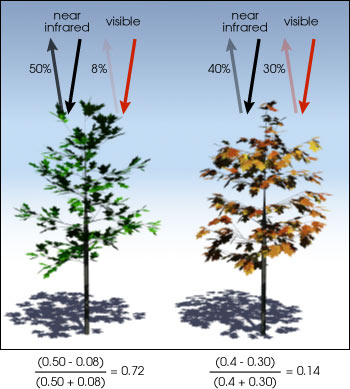

(image from NASA)

For example, when you have negative values, it’s highly likely that it’s water. On the other hand, if you have a NDVI value close to +1, there’s a high possibility that it’s dense green leaves.

But when NDVI is close to zero, there isn’t green leaves and it could even be an urbanized area.

(from https://gisgeography.com/ndvi-normalized-difference-vegetation-index/)

Satellites like Sentinel-2, Landsat and SPOT produce red and near infrared images, and so can be used to measure NDVI.

**How NDVI is used**

In agriculture, farmers use NDVI for precision farming and to measure biomass. In forestry, foresters use NDVI to quantify forest supply and leaf area index.

Furthermore, NASA states that NDVI is a good indicator of drought. When water limits vegetation growth, it has a lower relative NDVI and density of vegetation.

In reality, there are hundreds of applications where NDVI and other remote sensing applications is being applied to in the real world.


In [ ]:
from arcgis.raster import *
ndvi_map = gis.map('San Diego, CA')

ndvi_map

In [ ]:
ndvi_lr = ndvi(landsat, '5 4')
ndvi_map.content.add(ndvi_lr)


It's hard to tell which area has high NDVI. So let's reclassify it using remap and display larger NDVI values in green using 'colormap'

In [ ]:
enhanced_ndvi = colormap(remap(ndvi_lr, # reclassify pixels whose value is greater than 0.3 to 1, and the rest to no_data
                               input_ranges=[0.3, 1], 
                               output_values=[1], 
                               no_data_ranges=[-1, 0.3], astype='u8'), 
                        colormap=[[1, 124, 252, 0]], astype='u8')

In [ ]:
enhanced_ndvi.draw_graph()

### Take a note of the __remap__ and __colormap__ functions!
We will use them extensively.

__Remap__:
<img src="https://desktop.arcgis.com/en/arcmap/10.3/analyze/arcpy-spatial-analyst/GUID-20AE88DC-8B71-486A-8378-3B80333AF5CB-web.gif">

Often done when input values are continuous. 

__Colormap__ transforms the pixel values to display the raster data as either a grayscale or an RGB color image based on a color scheme or specific colors in a color map file.

<IMG SRC="https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/GUID-87825B8F-1528-4A92-ADBB-B53D20CC851C-web.gif">

In [ ]:
ndvi_map = gis.map('San Diego, CA')
ndvi_map.content.add(enhanced_ndvi) # high ndvi area becomes more visible
ndvi_map

In [ ]:
# Notice that the set of raster functions associated with landsat provides additional options, e.g. 
# NDVI Colorized
# Normalized Difference Moisture Index Colorized
# NDVI Raw
# let's use one of them instead

In [ ]:
# NDMI measures vegetation water content and moisture stress. Used in drought monitoring, agriculture, forestry
# NDMI = (NIR - SWIR) / (NIR + SWIR)
# +1 or near it: high vegetation water content, healthy crops; -1 is the opposite

ndmi_colorized = apply(landsat, 'Normalized Difference Moisture Index Colorized')
ndmi_colorized

In [ ]:
ndvi_map.content.add(ndmi_colorized) # adding ND moisture index layer
ndvi_map

Notice that there are several ways to compute a band combination such as NDVI from the original multi-spectral images:
 - use the __apply__ function, specifying NDVI as a parameter
 - use an associated function (such as __ndvi()__)
 - use __BandArithmetic()__
 - code an arithmetic operation over band values explicitly in a __raster calculator__ (you'll see this later)

### SAVI - another band combination


SAVI - The Soil-Adjusted Vegetation Index (SAVI) is a vegetation index that attempts to minimize soil brightness influences using a soil-brightness correction factor. This is often used in arid regions where vegetative cover is low. SAVI is computed as below, where L is the vegetation correction factor and varies from 1 to 0. A value L = 1 is used for no vegetation cover and L=0 for high vegetation cover.

    SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)



In [ ]:
savi_map = gis.map("Cairo")
savi_map

In [ ]:
from arcgis.raster.functions import savi
savi_map.zoom = 6
savi_map.content.add(savi(landsat, band_indexes="5 4 0.3"))

In this example, a 'well-known raster function' `BandArithmetic` was used to compute a vegetation index. This index illustrates how the banks and delta of the Nile river appears fertile in a relatively arid Sahara desert.

The example below is using `ExtractBand` function to create a [4,5,3] band combination, and applying the `Stretch` function to get the land-water boundary visualization that makes it easy to see where land is and where water is. Its worth noting that the raster function is applied at display resolution and only for the visible extent using on the fly image processing.

The bands used here are  4 (NIR), 5 (SWIR-1), and 3 (Red). You can build your own combination of bands using ExtractBand. Stretch() is used to improve contrast.


In [ ]:
land_water = stretch(extract_band(landsat, [4, 5, 3]),
                     stretch_type='PercentClip',
                     min_percent=2, 
                     max_percent=2,
                     dra=True, 
                     gamma=[1, 1, 1])

__Stretch__ is another function to remember.

<img src="https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/GUID-E383F01A-627E-45CA-9262-A3987C68AF94-web.gif">

It enhances an image (eg improving brightness or contrast) using several stretch types: 
 - Percent Clip
 - Standard deviation
 - Min-Max  
 - Sigmoid. 

In [ ]:
map2 = gis.map("San Diego, CA")
map2

In [ ]:
map2.content.add(land_water)

In [ ]:
land_water.draw_graph()

In [ ]:
from arcgis.geocoding import geocode

# get spatial extent of San Diego
# area = geocode('San Diego, CA', out_sr=landsat.properties.spatialReference)[0]
# area['extent']

area = geocode('92093', out_sr=landsat.properties.spatialReference)[0]
area['extent']

## Change detection

### Retrieve images for different times 

In [ ]:
selected = landsat.filter_by(time=[datetime(2015, 1, 1), datetime(2025, 2, 25)],
                             geometry=arcgis.geometry.filters.intersects(area['extent']))

# selected = landsat.filter_by(time=[datetime(2015, 1, 1), None],
#                              geometry=arcgis.geometry.filters.intersects(area['extent']))


df = selected.query(out_fields="AcquisitionDate, GroupName, CloudCover", 
                    order_by_fields="AcquisitionDate").sdf
df.head()

In [ ]:
df.tail(20)

In [ ]:
# Let's select items with relatively low cloud cover:

In [ ]:
old = landsat.filter_by('OBJECTID=2079634')   # 2015-01-04
new = landsat.filter_by('OBJECTID=5437900')   # 2024-12-06


### Let's see how vegetation changed between early 2015 and late in 2021

Instead of using the ndvi() method that applies a fixed raster algebra, let's do this through BandArithmetic() method that allows you to perform user-defined map algebra. 

In [ ]:
# ndvi_diff = ndvi(new, '5 4') - ndvi(old, '5 4')
ndvi_old = band_arithmetic(old, "(b5 - b4) / (b5 + b4)")
ndvi_new = band_arithmetic(new, "(b5 - b4) / (b5 + b4)")
ndvi_diff = ndvi_new - ndvi_old

In [ ]:
# creating a map
change_map = gis.map('92093')
change_map.content.add(ndvi_diff)
change_map

In [ ]:
# re-classify, to see the changes better
# high increase in vegetation will be colored green

threshold_val = 0.2
masked = colormap(remap(ndvi_diff, # assign pixels whose value is greater than 0.2 with 1, and the rest with no_data
                        input_ranges=[threshold_val, 1], 
                        output_values=[1], 
                        no_data_ranges=[-1, threshold_val], astype='u8'), 
                  colormap=[[1, 124, 252, 0]], astype='u8')


In [ ]:
# add this new layer to the map
change_map.content.remove_all()
change_map.content.add(masked)

In [ ]:
masked.draw_graph()

### Save your result

Imagery layers can be exported using the __export_image__ method.

In [ ]:
savedimg = ndvi_diff.export_image(bbox=area['extent'], size=[1200,450], f='image', save_folder='.', save_file='vegetation_change.jpg')
print(savedimg)

savedimg_colored = masked.export_image(bbox=area['extent'], size=[1200,450], f='image', save_folder='.', save_file='vegetation_change_colored.jpg')
print(savedimg_colored)